# Imersão de Dados 04 - Pesquisa de Imóveis em São Paulo

# Aula 01

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

data = pd.read_csv( url )
data.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


### DESAFIOS:
1. Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo)
2. Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)
3. Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)
4. Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)
5. Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)

#### 1. Realizar a média da metragem para cada um dos bairros

In [4]:
metragem_por_bairro = data.groupby( "Bairro" )["Metragem"].mean().sort_values( ascending=False )
metragem_por_bairro

Bairro
Sítio Represa                         37000.000000
Vila Castelo                           2850.000000
Jardim Guedala                         2486.640199
Jardim das Camélias                    1700.000000
Chácara Flora                          1260.727273
                                          ...     
Cidade Antônio Estevão de Carvalho       57.500000
Jardim Nova Germania                     57.000000
Jardim Benfica                           48.000000
Vila Leonor                              46.000000
Vila Guaca                               10.000000
Name: Metragem, Length: 701, dtype: float64

#### 2. Duas formas de selecionar os dados por bairro

In [5]:
# FORMA 01
data.loc[:, "Bairro"].head()

0     Planalto Paulista
1    Jardim dos Estados
2       Jardim Reimberg
3        Jardim Morumbi
4                 Mooca
Name: Bairro, dtype: object

In [6]:
# FORMA 02
data.iloc[:, 1].head()

0     Planalto Paulista
1    Jardim dos Estados
2       Jardim Reimberg
3        Jardim Morumbi
4                 Mooca
Name: Bairro, dtype: object

#### 3. Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão.

<AxesSubplot:xlabel='Banheiros'>

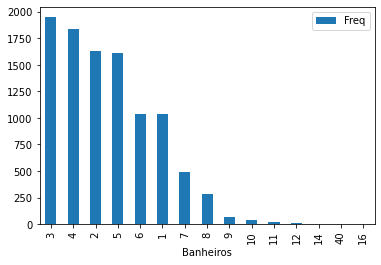

In [7]:
# Gráfico de barras
banheiros_value_counts = data["Banheiros"].value_counts().reset_index()
banheiros_value_counts.columns = ["Banheiros", "Freq"]
banheiros_value_counts.plot( x='Banheiros', y='Freq', kind='bar' )

<AxesSubplot:title={'center':'Top 10 Metragem Média por Bairro'}, xlabel='Bairro', ylabel='Média da Metragem'>

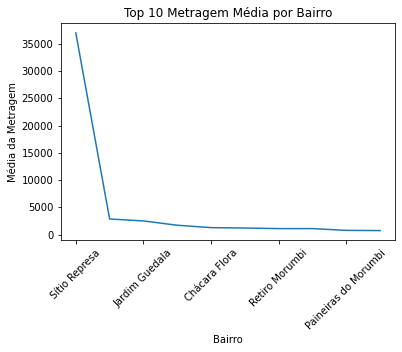

In [8]:
# Gráfico de linhas
metragem_por_bairro[:10].plot( title="Top 10 Metragem Média por Bairro", xlabel="Bairro", ylabel="Média da Metragem", rot=45 )

<AxesSubplot:title={'center':'Banheiros X Quartos'}, xlabel='Banheiros', ylabel='Quartos'>

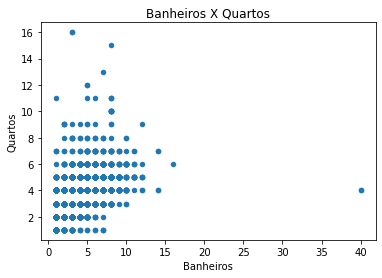

In [9]:
# Gráfico de Dispersão (Scatter Plot)
data.plot( x='Banheiros', y='Quartos', kind='scatter', title='Banheiros X Quartos' )

<AxesSubplot:>

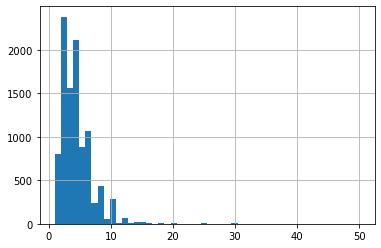

In [10]:
# Gráfico Histograma
data["Vagas"].hist( bins=50 )

<AxesSubplot:title={'center':'Ruas'}, ylabel='total'>

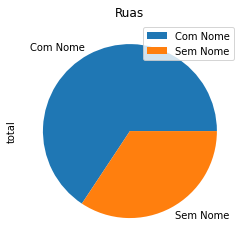

In [11]:
# Gráfico de Pizzas
ruas_sem_nome = data[data["Rua"].isna()].shape[0]
ruas_com_nome = data[~data["Rua"].isna()].shape[0]
df_ruas_nome = pd.DataFrame({
    'total': [ruas_com_nome, ruas_sem_nome]},
    index=['Com Nome', 'Sem Nome']
)

df_ruas_nome.plot.pie( y='total', title='Ruas' )

#### 4. Pegar outras estatísticas dos dados (como média, mediana, mim, max).

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [13]:
numeric_data = data.select_dtypes( include=['int64'] )
categorical_data = data.select_dtypes( exclude=['int64'] )

In [14]:
# Tabela de métricas para DADOS NÚMERICOS
df_numeric_data = pd.DataFrame( {"Min": numeric_data.min(), "Max": numeric_data.max(), "Media": numeric_data.mean(), "Mediana": numeric_data.median()} )
df_numeric_data

,Min,Max,Media,Mediana
Metragem,10,750000,442.300659,290.0
Quartos,1,16,3.483114,3.0
Banheiros,1,40,3.879097,4.0
Vagas,1,50,4.097222,4.0


In [15]:
# Tabela de métricas para DADOS CATEÓRICOS
df_cateorical_data = pd.DataFrame( {"Contagem": categorical_data.count(), "Únicos": categorical_data.nunique(), \
    "Top": categorical_data.value_counts().reset_index().iloc[0, 0], "Freq": categorical_data.value_counts().reset_index().iloc[0, 1]} )
df_numeric_data

,Min,Max,Media,Mediana
Metragem,10,750000,442.300659,290.0
Quartos,1,16,3.483114,3.0
Banheiros,1,40,3.879097,4.0
Vagas,1,50,4.097222,4.0


#### 5. Descobrir quais são os bairros que não tem nome de rua.

In [16]:
bairros_sem_nome_de_rua = data[data["Rua"].isna()].Bairro.unique()
bairros_sem_nome_de_rua

array(['Jardim Morumbi', 'Jardim Luzitânia', 'Parque da Lapa',
       'Chácara Santo Antônio (Zona Sul)', 'Jardim Guedala',
       'Vila Arriete', 'Alto de Pinheiros', 'Planalto Paulista',
       'Vila Moinho Velho', 'Brooklin Paulista', 'Sumaré',
       'Jardim Paulista', 'Vila Gustavo', 'Jardim Trussardi',
       'Vila Madalena', 'Jardim dos Estados', 'Vila Santos',
       'Jardim Europa', 'Butantã', 'Jardim Paulistano',
       'Jardim Petrópolis', 'Vila Mariana', 'Vila Aparecida', 'Siciliano',
       'Alto da Lapa', 'Jardim da Glória', 'Morumbi', 'Vila Ida',
       'Cidade Jardim', 'Cidade Dutra', 'Água Fria', 'Parque Boturussu',
       'Belenzinho', 'Vila Sônia', 'Jardim Panorama', 'Jardim Ampliação',
       'Lauzane Paulista', 'Vila Sabrina', 'Vila Olímpia',
       'Jardim Franca', 'Jardim Sílvia (Zona Oeste)', 'Santo Amaro',
       'Mooca', 'Jardim América', 'Interlagos', 'Pacaembu',
       'Jardim Santo Amaro', 'Vila Matilde', 'Vila Prudente',
       'Vila Nova Conceição', 'Jard

<AxesSubplot:title={'center':'% de Bairros com Ruas COM X SEM Nome'}, ylabel='Porcentagem (%)'>

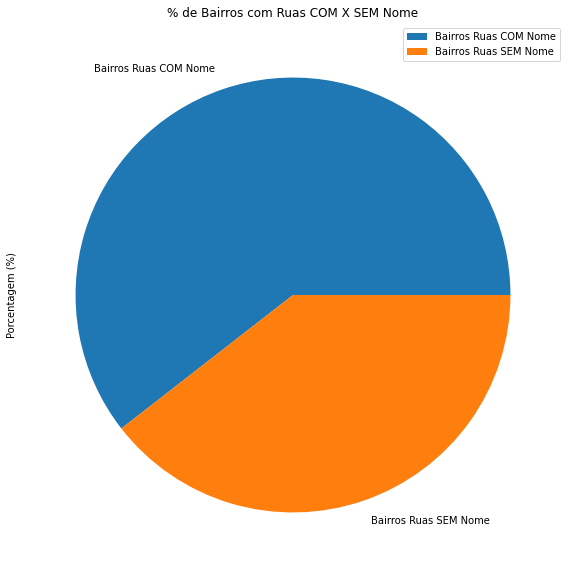

In [22]:
bairros_com_nome_de_rua = data[~data["Rua"].isna()].Bairro.nunique()
bairros_com_nome_de_rua

df_porc_bairros_rua_nome = pd.DataFrame({
    'Porcentagem (%)': [bairros_com_nome_de_rua, bairros_sem_nome_de_rua.shape[0]]},
    index=['Bairros Ruas COM Nome', 'Bairros Ruas SEM Nome']
)

df_porc_bairros_rua_nome.plot.pie( y='Porcentagem (%)', title='% de Bairros com Ruas COM X SEM Nome', figsize=(10, 10) )